In [1]:
#Multi-class classificatin 
#import tensorflow as tf
#from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us.
#(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import gzip
import matplotlib.pyplot as plt

# Specify your local path
#local_path = 'C:/Users/SIPHI/OneDrive/Desktop/Dataset/'
# Load the datasets locally
#train_data = np.load(local_path + 'train-images-idx3-ubyte.npy')
#train_labels = np.load(local_path + 'train-labels-idx1-ubyte.npy')
#test_data = np.load(local_path + 't10k-images-idx3-ubyte.npy')
#test_labels = np.load(local_path + 't10k-labels-idx1-ubyte.npy')


# Specify your local path
local_path = 'C:/Users/SIPHI/OneDrive/Desktop/Dataset/1/'

# Load the datasets locally
with gzip.open(local_path + 'train-images-idx3-ubyte.gz', 'rb') as f:
    train_data = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

with gzip.open(local_path + 'train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

with gzip.open(local_path + 't10k-images-idx3-ubyte.gz', 'rb') as f:
    test_data = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

with gzip.open(local_path + 't10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

In [7]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [3]:
train_data[0].shape, train_labels[7].shape

((28, 28), ())

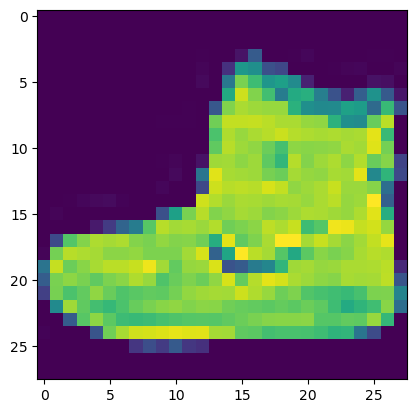

In [8]:
#Plot the single sample
plt.imshow(train_data[0])

In [5]:
train_labels[8]

5

In [9]:
#Create a small list so we can index to the readable form
class_names = ["T-shit/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]
len(class_names)

10

Text(0.5, 1.0, 'Shirt')

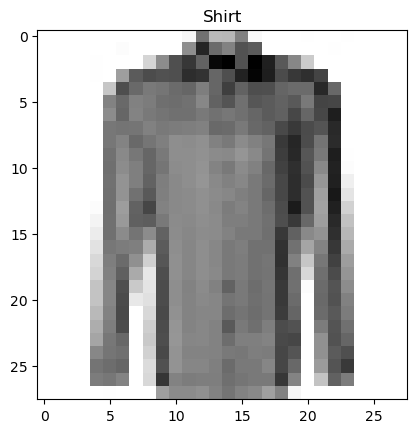

In [12]:
#Plot an example image and its label
index_of_choice = 140
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

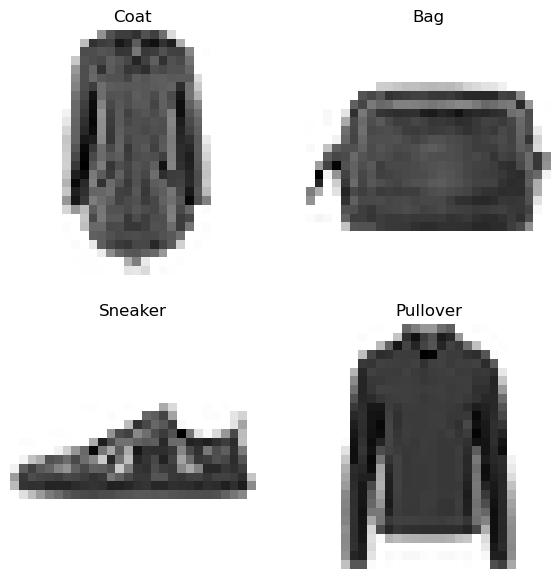

In [13]:
#Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [14]:
print(tf.__version__)

2.10.0


In [15]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
#Lets build a model for multi_class classification
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Fit the model
non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.5277 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [12]:
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [13]:
# import logging
# logging.getLogger("tensorflow").setLevel(logging.DEBUG)


In [14]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())


In [15]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(gpus))


In [16]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [17]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [18]:
# import tensorflow as tf

# # Explicitly specify the GPU devices
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to use only the first GPU
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#     except RuntimeError as e:
#         # Visible devices must be set at program startup
#         print(e)


In [19]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Example: Set the visible GPU devices
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to use only the first GPU
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#     except RuntimeError as e:
#         # Visible devices must be set at program startup
#         print(e)

# # Build a simple model
# model = models.Sequential([
#     layers.Flatten(input_shape=(28, 28)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Assuming you have a dataset named 'train_data' and 'train_labels', you can fit the model
# # model.fit(train_data, train_labels, epochs=5, validation_split=0.2)


In [20]:
#Lets build a model for multi_class classification
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Fit the model
non_norm_history_2 = model_2.fit(train_data,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2802 - accuracy: 0.1156 - val_loss: 1.9947 - val_accuracy: 0.2004
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8460 - accuracy: 0.2458 - val_loss: 1.7751 - val_accuracy: 0.2600
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6824 - accuracy: 0.3012 - val_loss: 1.5634 - val_accuracy: 0.3237
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5153 - accuracy: 0.3341 - val_loss: 1.5045 - val_accuracy: 0.3199
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4644 - accuracy: 0.3435 - val_loss: 1.4539 - val_accuracy: 0.3460
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4380 - accuracy: 0.3519 - val_loss: 1.4688 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4105 - accuracy: 0.3760 - val_loss: 1.3893 - val_accuracy

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [22]:
train_data.min(), train_data.max()

(0, 255)

## We have to normalize our data to have 0 and 1 by diving with max...this is refered to scalling or normalization

In [23]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max of the normalized or scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [24]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Fit the model
norm_history_3 = model_3.fit(train_data_norm,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7495 - accuracy: 0.2932 - val_loss: 1.4058 - val_accuracy: 0.4054
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3161 - accuracy: 0.4545 - val_loss: 1.2581 - val_accuracy: 0.4860
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2192 - accuracy: 0.5003 - val_loss: 1.1933 - val_accuracy: 0.5151
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1687 - accuracy: 0.5249 - val_loss: 1.1579 - val_accuracy: 0.5317
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1333 - accuracy: 0.5501 - val_loss: 1.1273 - val_accuracy: 0.5576
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1058 - accuracy: 0.5690 - val_loss: 1.1025 - val_accuracy: 0.5714
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0866 - accuracy: 0.5795 - val_loss: 1.0845 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

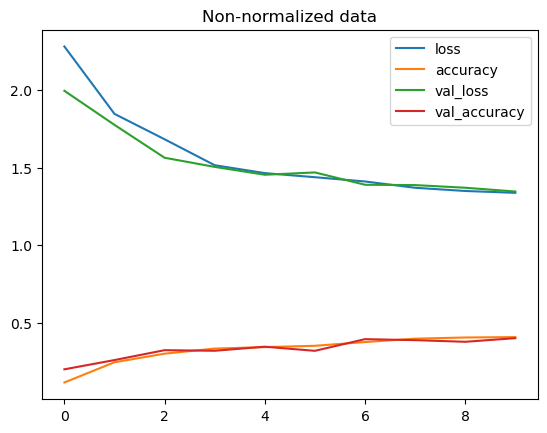

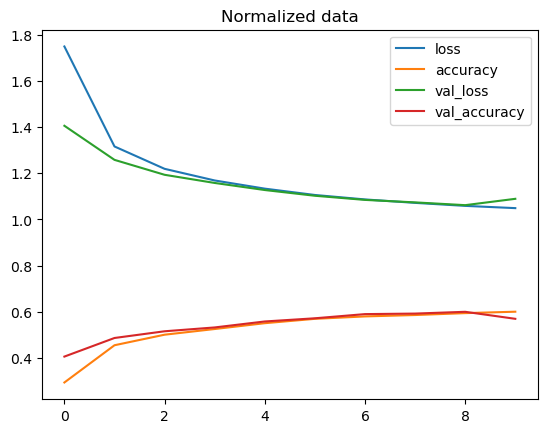

In [25]:
import pandas as pd

#Plot the non-normilized data loss curves
pd.DataFrame(non_norm_history_2.history).plot(title="Non-normalized data")

#Plot the normalized data loss curves
pd.DataFrame(norm_history_3.history).plot(title="Normalized data")


In [26]:
#Finding the ideal learning rate
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#Fit the model
norm_history_4 = model_4.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1546 - accuracy: 0.1783 - val_loss: 1.8737 - val_accuracy: 0.2590 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6703 - accuracy: 0.3966 - val_loss: 1.5573 - val_accuracy: 0.4404 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4631 - accuracy: 0.4719 - val_loss: 1.3989 - val_accuracy: 0.5042 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2866 - accuracy: 0.5968 - val_loss: 1.1936 - val_accuracy: 0.6542 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0838 - accuracy: 0.7047 - val_loss: 1.0173 - val_accuracy: 0.7268 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9414 - accuracy: 0.7401 - val_loss: 0.9059 - val_accuracy: 0.7435 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'Finding the ideal learning rate')

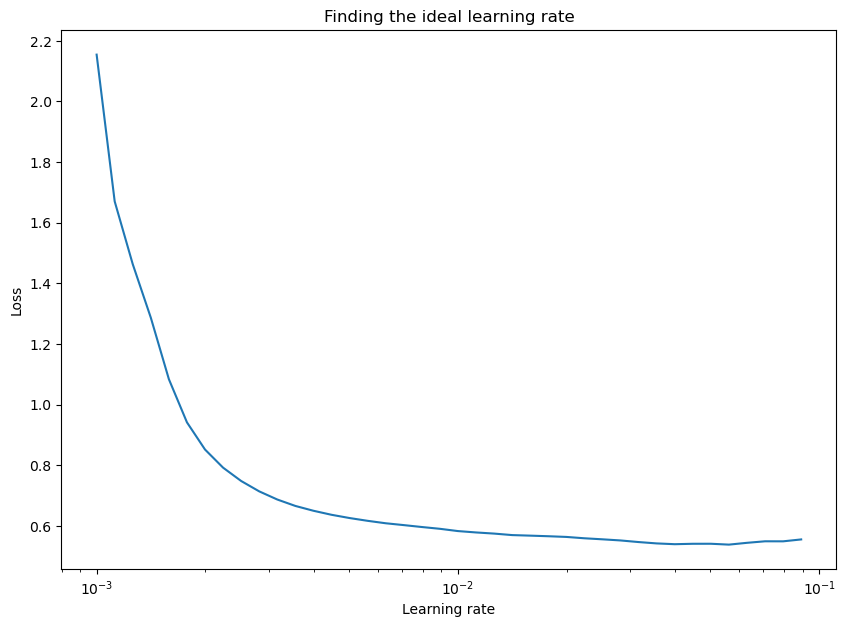

In [27]:
#Plot the learning rate decay curve
lrs = 1e-3*10**(tf.range(40)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, norm_history_4.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [28]:
10**-3

0.001

In [29]:
#Finding the ideal learning rate
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

#Fit the model
norm_history_5 = model_5.fit(train_data_norm,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1216 - accuracy: 0.5662 - val_loss: 0.7511 - val_accuracy: 0.7073
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6898 - accuracy: 0.7263 - val_loss: 0.6998 - val_accuracy: 0.7170
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6491 - accuracy: 0.7386 - val_loss: 0.6638 - val_accuracy: 0.7321
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6312 - accuracy: 0.7471 - val_loss: 0.6619 - val_accuracy: 0.7415
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6117 - accuracy: 0.7652 - val_loss: 0.6471 - val_accuracy: 0.7674
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5900 - accuracy: 0.7817 - val_loss: 0.6165 - val_accuracy: 0.7744
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5775 - accuracy: 0.7854 - val_loss: 0.6367 - val_accuracy:

In [30]:
#Finding the ideal learning rate
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

#Fit the model
norm_history_6 = model_6.fit(train_data_norm,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0336 - accuracy: 0.5895 - val_loss: 0.8201 - val_accuracy: 0.6992
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7959 - accuracy: 0.7081 - val_loss: 0.8193 - val_accuracy: 0.7137
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7804 - accuracy: 0.7148 - val_loss: 0.7982 - val_accuracy: 0.7070
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7697 - accuracy: 0.7227 - val_loss: 0.7743 - val_accuracy: 0.7288
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7653 - accuracy: 0.7253 - val_loss: 0.7838 - val_accuracy: 0.7327
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7599 - accuracy: 0.7262 - val_loss: 0.7698 - val_accuracy: 0.7219
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7604 - accuracy: 0.7278 - val_loss: 0.8140 - val_accuracy:

In [31]:
#Finding the ideal learning rate
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile our model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

#Fit the model
norm_history_7 = model_7.fit(train_data_norm,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6943 - accuracy: 0.2673 - val_loss: 1.4845 - val_accuracy: 0.3118
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2031 - accuracy: 0.4712 - val_loss: 0.9937 - val_accuracy: 0.5896
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9109 - accuracy: 0.6393 - val_loss: 0.9014 - val_accuracy: 0.6482
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8342 - accuracy: 0.6902 - val_loss: 0.8352 - val_accuracy: 0.7063
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7786 - accuracy: 0.7150 - val_loss: 0.7862 - val_accuracy: 0.7206
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7495 - accuracy: 0.7271 - val_loss: 0.7966 - val_accuracy: 0.7224
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7330 - accuracy: 0.7347 - val_loss: 0.7700 - val_accuracy:

# Evaluate our multi-class classification model we could:
## -we could evaluate its perfomance using other classification metrics such as (confusion_matrix)
## -Improve by training for longer

In [32]:
# function for confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes=None, fz=(10, 10), text_size=15):
 import itertools
    
 cm = confusion_matrix(y_true, tf.round(y_pred))
 cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]

 n_classes = cm.shape[0]

 #Let us prettify it
 fig, ax = plt.subplots(figsize=fz)
 #Create a matrix plot
 cax = ax.matshow(cm, cmap=plt.cm.Blues)
 fig.colorbar(cax)

 #Create classes
 #classes = False

# Set labels to be classes
 if classes:
     labels = classes
 else:
    labels = np.arange(n_classes)

 #Label axes
 ax.set(title="Confusion_matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

 #Set x-axis label buttom
 ax.xaxis.set_label_position("bottom")
 ax.xaxis.tick_bottom()

 #Adjust label size
 ax.yaxis.label.set_size(text_size)
 ax.xaxis.label.set_size(text_size)
 ax.title.set_size(text_size)

 #Set threshold for different colours
 threshold = (cm.max() + cm.min())/ 2.

 #Plot the text on each cell
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
     horizontalalignment="center",
     color="white" if cm[i, j] > threshold else "black",
     size = text_size)  

In [33]:
class_names

['T-shit/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel boot']

In [34]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
# Make some predictions with our model
y_probs = model_7.predict(test_data_norm) #probs is short for "prediction probabilities"

#View first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[7.48900084e-06, 5.16933980e-08, 2.45610172e-05, 3.74148076e-04,
        1.28912608e-04, 1.28924489e-01, 6.98344302e-05, 8.34958732e-01,
        6.40439685e-04, 3.48712765e-02],
       [3.87701206e-02, 1.44254591e-06, 2.71052837e-01, 5.45704415e-06,
        3.73603374e-01, 1.17134648e-17, 3.16509932e-01, 0.00000000e+00,
        5.68660907e-05, 0.00000000e+00],
       [1.04888249e-03, 9.98609781e-01, 1.52371382e-09, 3.39794351e-04,
        3.53795970e-09, 1.05761696e-26, 1.52123630e-06, 0.00000000e+00,
        3.28161489e-13, 0.00000000e+00],
       [3.39033199e-03, 9.93982613e-01, 2.58555133e-08, 2.61304341e-03,
        7.35274952e-08, 1.42901118e-22, 1.40011734e-05, 4.45081539e-37,
        3.28869917e-11, 0.00000000e+00],
       [1.74666405e-01, 1.27183492e-04, 2.44156227e-01, 3.19931135e-02,
        1.68271169e-01, 1.90748466e-08, 3.79787266e-01, 1.42827860e-18,
        9.98637057e-04, 0.00000000e+00]], dtype=float32)

# **Note** Remember to make preds on the same dataset.

In [36]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0]).numpy()]

(array([7.4890008e-06, 5.1693398e-08, 2.4561017e-05, 3.7414808e-04,
        1.2891261e-04, 1.2892449e-01, 6.9834430e-05, 8.3495873e-01,
        6.4043968e-04, 3.4871276e-02], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [37]:
# Convert all of the preds probabilities into intergers
y_preds = y_probs.argmax(axis=1)

# View first 10 preds labels
y_preds[:10]

array([7, 4, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[757,   4,  40, 106,  20,   2,  59,   0,  12,   0],
       [ 14, 923,   1,  51,   4,   1,   6,   0,   0,   0],
       [ 35,   0, 575,  13, 269,   2,  97,   0,   9,   0],
       [ 44,  19,   8, 816,  32,   8,  62,   3,   7,   1],
       [  5,   0, 101,  44, 757,   0,  64,   0,  29,   0],
       [  0,   0,   0,   4,   0, 857,   0, 109,  10,  20],
       [174,   0, 128,  84, 462,   2, 127,   0,  23,   0],
       [  0,   0,   0,   0,   0, 125,   0, 841,   0,  34],
       [  0,   0,   3,   9,  50,  59,   5,   5, 867,   2],
       [  0,   0,   0,   1,   0,   8,   0, 138,   1, 852]], dtype=int64)

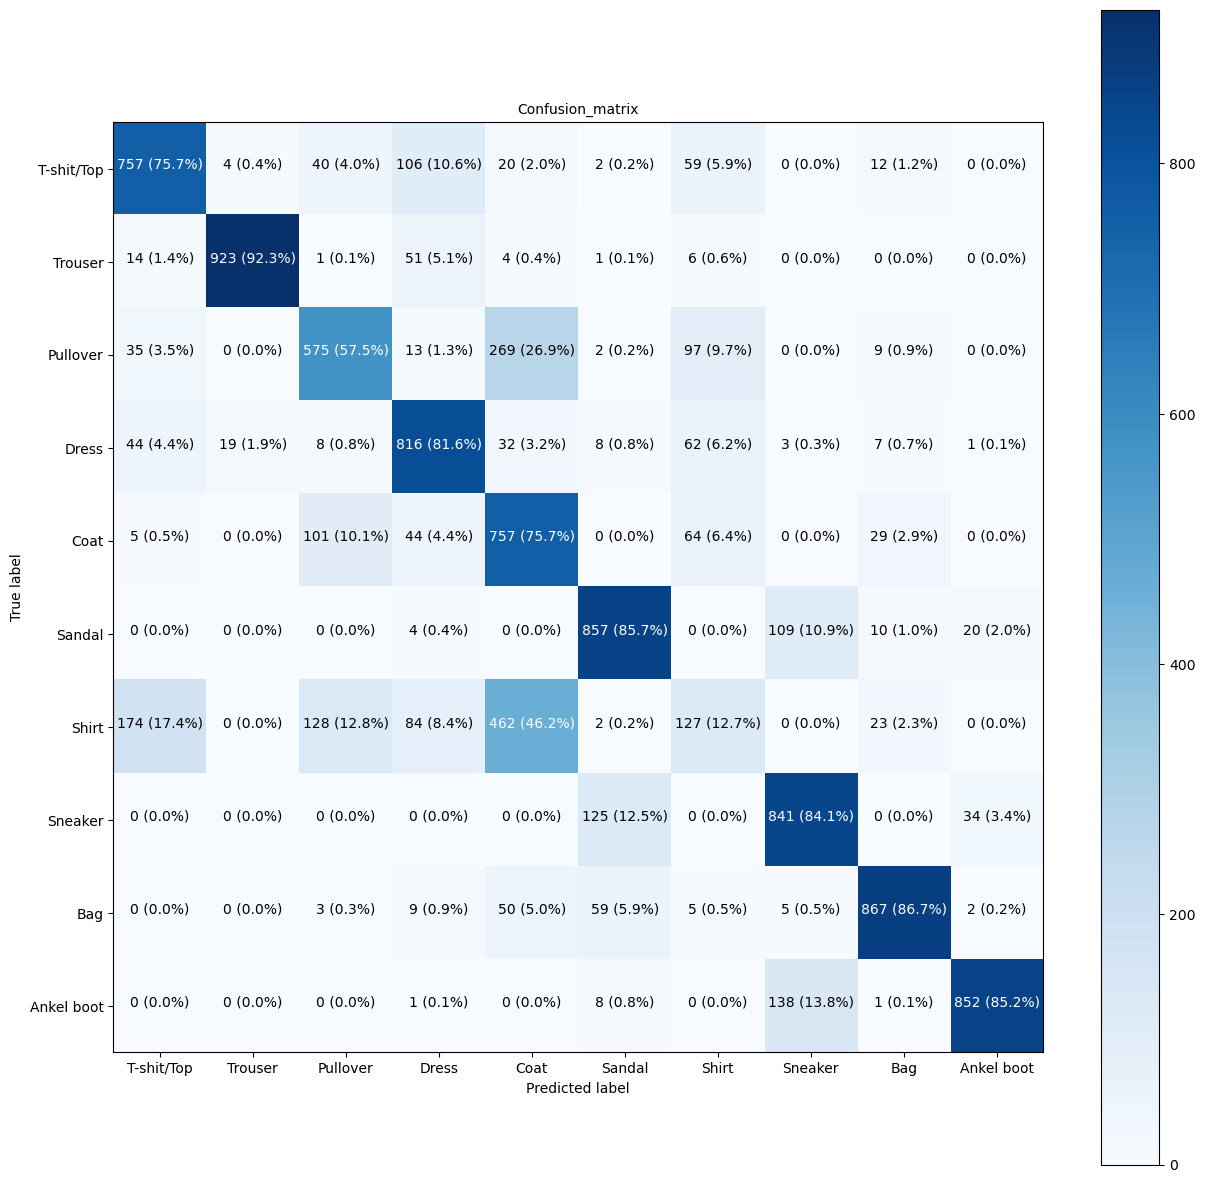

In [39]:
plot_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      fz=(15, 15),
                      text_size=10)

### Create a little for:
#### Plot a random image
#### Make a prediction on said image
#### Label the plot with the true label and predicted label

In [40]:
import random
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plot it and label it with a prediction and true label
    """
    #Set up random integers
    i = random.randint(0, len(images))

    #Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    #Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    #Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    #Add xlabel info (prediction/ true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)
    

1/1 [==============================] - 0s 63ms/step


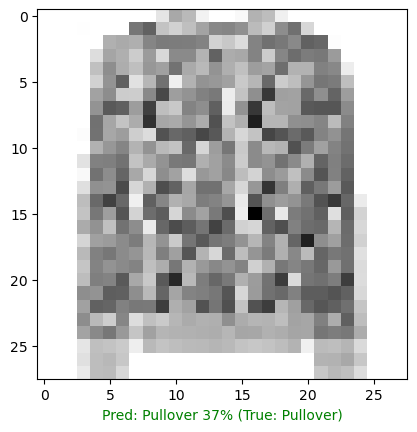

In [48]:
# Check out a rand image as well as its prediction
plot_random_image(model=model_7,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What pattern is our model is learning?

In [42]:
#Find the layers of our most recent model
model_7.layers

In [43]:
#Extract a particular layer
model_7.layers[1]

In [44]:
#Get the patterns of a layer in our network
weights, biases = model_7.layers[1].get_weights()

weights , biases, weights.shape, biases.shape

(array([[ 0.75293726, -0.04382335, -0.6888609 , -0.05803765],
        [ 0.6999284 , -0.09405393, -0.9084009 ,  0.07131055],
        [ 1.1951036 , -0.04102439, -0.7818273 , -0.0811931 ],
        ...,
        [ 0.0775044 , -0.01559457,  0.16815239, -0.00210723],
        [-0.25990897, -0.08644024,  0.19121169,  0.03341614],
        [ 0.45950612, -0.03183552, -0.38817906,  0.06737053]],
       dtype=float32),
 array([ 3.8795433 , -0.05915669,  3.5173604 , -0.01889922], dtype=float32),
 (784, 4),
 (4,))

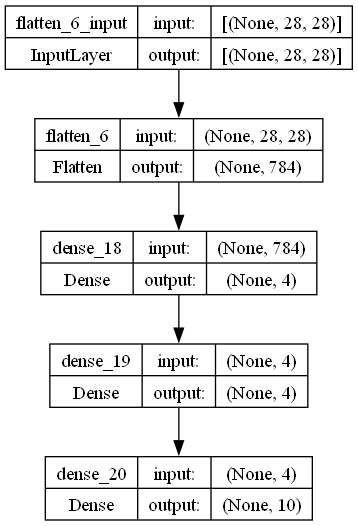

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)